In [613]:
# Last Update: 24/06/2020
# AndreHAM

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [ ]:
# ====    TUTORIAL ON BROWNION MOTION    ====

In [ ]:
# The Langevin equation could be used to describe the motian of a brownian particle due to its stochastic nature. 
# The equation is derived directly from the Newton's second Law  (F = m*a = m (dv(t))/dt), considering the 
# existence of the fluid's drag force and a random force due to the ambient molecules collisions


#      m*dv(t)/dt = -gamma*v(t) + eta(t),         v(t) =(dx(t))/dt


# - m: particle mass;
# - gamma: friction term;
# - v(t): particle velocity;
# - x(t): particle position;
# - eta(t): Noise/Stochastic force


# The noise term should satisfy some properties: 

# i. <eta(t)> = 0
# ii. <eta_{i}(t)eta_{i}(t)(t')> = 2*kb*T gamma*delta_{ij}*delta(t-t')

# with temperature T, and Boltzmann cte kb.



###### Approach:

# To simulate the brownian motion we will discretize the langevin equation by finite difference in the following way:

# i.      v(t)= (dx(t))/dt   ---->   v[i] = (x[i] - x[i-1])/dt         

# ii.     m (v[i] - v[i-1])/dt = -gamma*v[i] + eta[i]

# where dt is the time step. Notice, however, that the equality is only true for  dt ->  0.


###### Reference:

# For a very interesting - more complete, complex - and useful paper on it I strongly recommend [1].

# [1] Simulation of a Brownian particle in an optical trap, Volpe, G., Volpe, G.

In [614]:
#############  1-D CASE


##### PARAMETERS #####

Tf = 100000      # Final time - seconds
m = 1          # Particle mass
gamma = 2      # Friction
kb = 1         # Boltzmann cte = 1 for simplicity
T = 300        # [k] - Temperature

######################



###### Discrete time
t = np.linspace(0, 1000, num = Tf)
dt = t[2]-t[1]




###### Noise
aux = np.zeros(Tf) # auxiliar array of the right size

# Function to create random numbers
Random = lambda n: np.random.normal(loc=0.0, scale=1.0) # Generate random number || with 0 mean, 1 standard deviation 
MapRandom = map(Random,aux)

# Array of Noise
eta = np.sqrt(2*kb*T*gamma)*np.array(list(MapRandom)) # eta(t)




###### Initial position and velocity

x0 = 0          
v0 = 0       

###### Arrays of position and velocities

x = np.zeros(1)
x[0] = x0
v = np.zeros(1)
v[0] = v0


###### Discrete Langevin Equation

i = 1
while i < Tf:
    v = np.append(v, ((dt/m)*eta[i]+v[i-1])/(1+(dt/m)*gamma))
    x = np.append(x, x[i-1] + v[i]*dt)
    i+=1

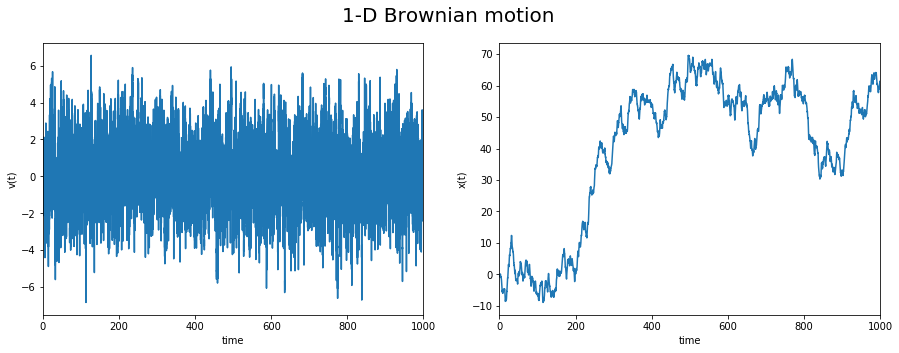

In [615]:
#### PLOTS

fig, (left, right) = plt.subplots(1, 2, figsize=(15,5))

right.plot(t, x)
left.plot(t, v)

fig.suptitle('1-D Brownian motion', fontsize=20)
right.set(xlabel = "time", ylabel = "x(t)")
left.set(xlabel = "time", ylabel = "v(t)")

right.set_xlim([0, 1000]);
left.set_xlim([0, 1000]);

In [ ]:
### The generalization for more dimensions is straightforward

In [616]:
#############  3-D CASE


##### PARAMETERS #####

Tf = 100000      # Final time - seconds
m = 1          # Particle mass
gamma = 2      # Friction
kb = 1         # Boltzmann cte = 1 for simplicity
T = 300        # [k] - Temperature

######################



###### Discrete time
t = np.linspace(0, 1000, num = Tf)
dt = t[2]-t[1]


###### Noise
aux = np.zeros(3*Tf) # auxiliar array of the right size (for each dimension)

Random = lambda n: np.random.normal(loc=0.0, scale=1.0) # Generate random number || with 0 mean, 1 standard deviation 
MapRandom = map(Random,aux)

eta = np.split(np.sqrt(2*kb*T*gamma)*np.array(list(MapRandom)),3)

###### Initial position and velocity

x0 = 10
y0 = 10
z0 = 10


vx0 = 0
vy0 = 0
vz0 = 0

###### Arrays of position and velocities

q = np.zeros(3)
q = np.split(q,3)
q[0][0] = x0
q[1][0] = y0
q[2][0] = z0


V = np.zeros(3)
V = np.split(V,3)
V[0][0] = vx0
V[1][0] = vy0
V[2][0] = vz0


###### Discrete Langevin Equation

# Dimension loop
j = 0
while j < 3:
    # time evolution loop
    i = 1
    while i < Tf:
        V[j] = np.append(V[j], ((dt/m)*eta[j][i]+V[j][i-1])/(1+(dt/m)*gamma))
        q[j] = np.append(q[j], q[j][i-1] + V[j][i]*dt)
        i+=1    
    j+=1

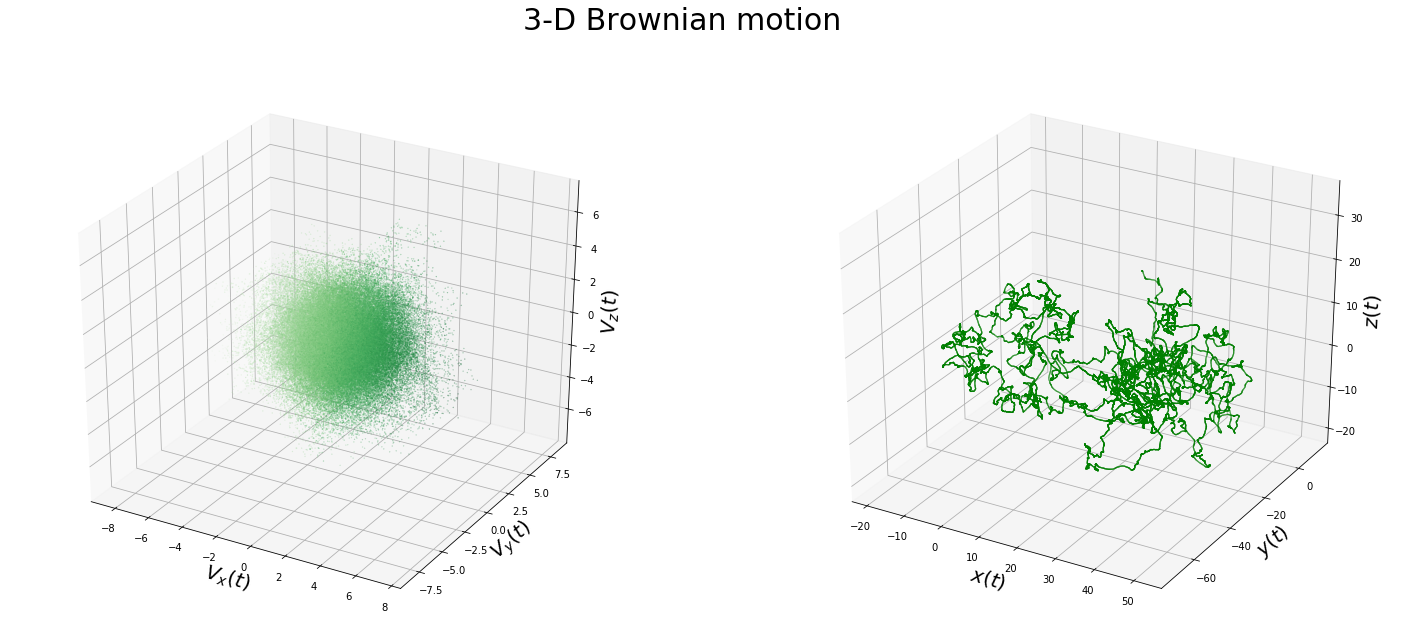

In [618]:
###### PLOTS

fig = plt.figure(figsize=(25,10))

##### Right side plot
right = fig.add_subplot(1, 2, 2, projection='3d')
right.scatter3D(q[0], q[1], q[2], zdir = q[2], s=0.05, c='Green', cmap='Greens');

##### Left side plot
left = fig.add_subplot(1, 2, 1, projection='3d')
left.scatter3D(V[0], V[1], V[2], zdir = V[2], s=0.05, c=V[0], cmap='Greens');

fig.suptitle('3-D Brownian motion', fontsize=30)

right.set_zlabel('$z(t)$', fontsize=20, rotation = 0)
right.set_ylabel('$y(t)$', fontsize=20, rotation = 0)
right.set_xlabel('$x(t)$', fontsize=20, rotation = 0)

left.set_zlabel('$V_{z}(t)$', fontsize=20, rotation = 0);
left.set_ylabel('$V_{y}(t)$', fontsize=20, rotation = 0);
left.set_xlabel('$V_{x}(t)$', fontsize=20, rotation = 0);